# KNN

## Necessary libraries

In [8]:
%pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Load the data and define variables

In [9]:
# Taining and testing data
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

# Size of the images
image_width = 28
image_height = 28

In [10]:
# training images
X = np.array(train.drop('label', axis=1))
# training labels
y = np.array(train['label'])

# number of examples
m = len(y)

# normalize the data
# Pixel values typically range from 0 to 255.
# Dividing by 255.0 scales the data to a [0, 1] range.
# Normalization improves the performance and convergence speed of many machine learning algorithms

pixel_max_value = 255.0

X = np.array(X , dtype='float')/ pixel_max_value

# number of different labels
n_classes = len(np.unique(y))

# we get 24 instead of 26 labels because we do not have "j" and "z" samples (maybe because they are movement signals).
# in order to not get empty labels lets rename the labels
for i in range(len(y)):
    if y[i] > 8:
        y[i] -= 1

print(f'Number of training examples: {m}')
print(f'Number of features: {X.shape[1]}')
print(f'Number of classes: {n_classes}')
print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')


Number of training examples: 27455
Number of features: 784
Number of classes: 24
X_shape: (27455, 784)
y_shape: (27455,)


## Model Test Data

In [11]:
X_test = np.array(test.drop('label', axis=1))
y_test = np.array(test['label'])

# number of test examples
m_test = len(y_test)

pixel_max_value = 255.0

X_test = np.array(X_test , dtype='float')/ pixel_max_value

n_test_classes = len(np.unique(y_test))

for i in range(len(y_test)):
    if y_test[i] > 8:
        y_test[i] -= 1


print(f'Number of test examples: {m_test}')
print(f'Number of test features: {X_test.shape[1]}')
print(f'Number of test classes: {n_test_classes}')
print(f'X_shape: {X_test.shape}')
print(f'y_shape: {y_test.shape}')

Number of test examples: 7172
Number of test features: 784
Number of test classes: 24
X_shape: (7172, 784)
y_shape: (7172,)


## Test Model

k=1, Accuracy=0.8104
k=2, Accuracy=0.8034
k=3, Accuracy=0.8040
k=4, Accuracy=0.8034
k=5, Accuracy=0.8059
k=6, Accuracy=0.8013
k=7, Accuracy=0.8017
k=8, Accuracy=0.7970
k=9, Accuracy=0.7957
k=10, Accuracy=0.7939
k=11, Accuracy=0.7949
k=12, Accuracy=0.7896
k=13, Accuracy=0.7902
k=14, Accuracy=0.7888
k=15, Accuracy=0.7856


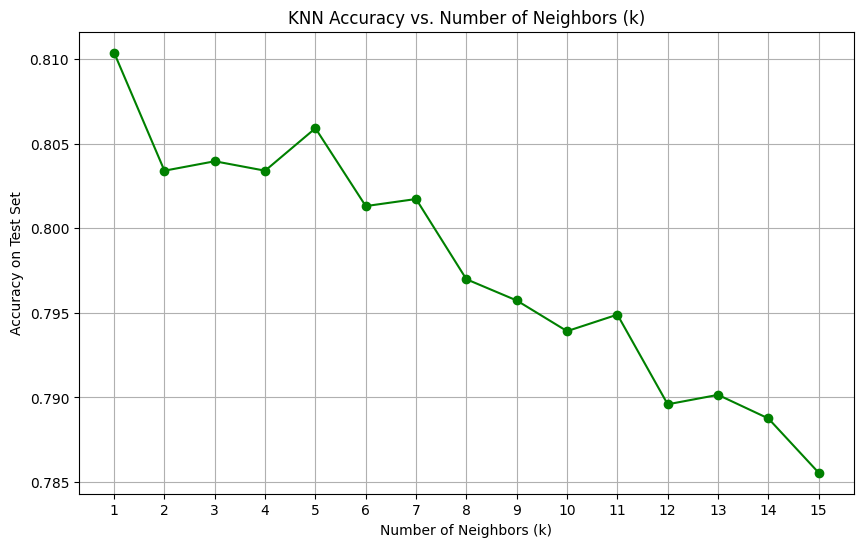


Best k: 1 with Accuracy: 0.8104

Classification Report for Best k:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       0.97      0.94      0.95       432
           2       0.96      1.00      0.98       310
           3       0.80      0.92      0.86       245
           4       0.79      0.97      0.87       498
           5       0.95      0.91      0.93       247
           6       0.90      0.95      0.92       348
           7       0.98      0.94      0.96       436
           8       0.86      0.67      0.75       288
           9       0.83      0.56      0.67       331
          10       0.93      0.91      0.92       209
          11       0.81      0.52      0.63       394
          12       0.78      0.64      0.70       291
          13       1.00      0.92      0.96       246
          14       1.00      1.00      1.00       347
          15       0.94      1.00      0.97       164
          16 

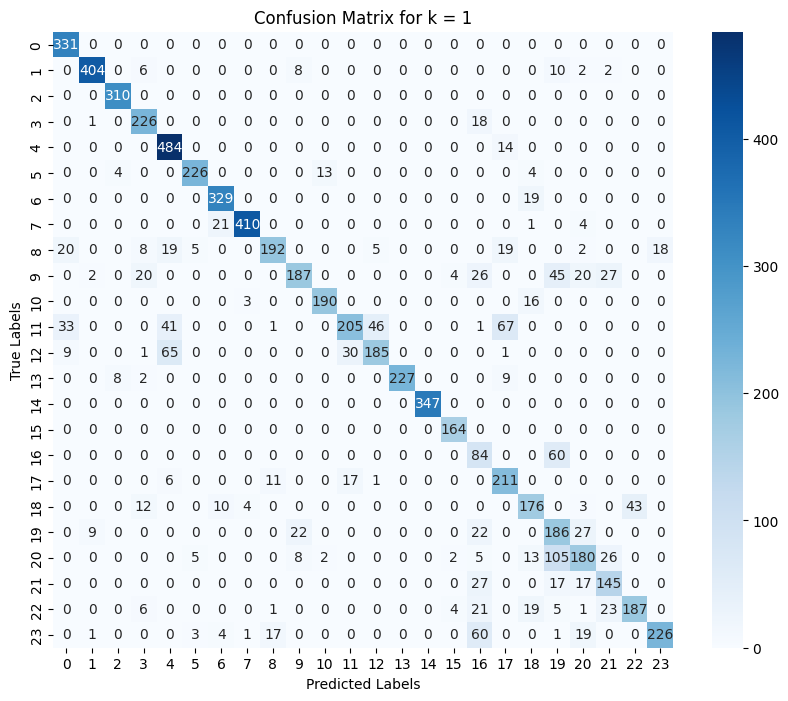

In [13]:
# Try different values of k
k_values = list(range(1, 16)) 
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# Plotting accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='green')
plt.title("KNN Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find best k
best_k_index = np.argmax(accuracies)
best_k = k_values[best_k_index]
best_accuracy = accuracies[best_k_index]

print(f"\nBest k: {best_k} with Accuracy: {best_accuracy:.4f}")

# Train and evaluate best model
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X, y)
best_y_pred = best_model.predict(X_test)

# Classification Report
print("\nClassification Report for Best k:")
print(classification_report(y_test, best_y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for k = {best_k}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

> My results conclude that K=1 is the number of neighboors which allows the algorithm to have better accuracy.

- KNN with k=1 simply predicts the class of the closest training sample.
- It perfectly memorizes the training data — no averaging, no generalization.

It may indicate overfitting, but accuracy doesn't drop much for higher number of k.